In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data

In [4]:
data=pd.read_csv("Stock_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-27,9982.179688,10159.879883,9936.620117,10150.650391,10150.650391,207760000
1,2010-08-30,10145.580078,10150.570313,10007.679688,10009.730469,10009.730469,150480000
2,2010-08-31,10006.419922,10073.379883,9941.839844,10014.719727,10014.719727,255420000
3,2010-09-01,10016.009766,10279.080078,10016.009766,10269.469727,10269.469727,205710000
4,2010-09-02,10270.080078,10320.370117,10253.959961,10320.099609,10320.099609,149930000


# Data prepration


In [6]:
#shape
data.shape

(2014, 7)

## statistical summary

In [7]:
#descriptions
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2.014000e+03
mean,16756.880170,16835.962791,16676.660195,16762.755255,16762.755255,1.699523e+08
std,3985.884743,3992.888506,3977.350484,3984.242430,3984.242430,1.072222e+08
min,9982.179688,10073.379883,9936.620117,10009.730469,10009.730469,8.410000e+06
25%,13104.239746,13175.674805,13045.425049,13107.277588,13107.277588,9.486500e+07
50%,16566.544922,16652.890625,16500.360352,16571.265625,16571.265625,1.284750e+08
75%,18282.699219,18350.062988,18205.062500,18287.908203,18287.908203,2.177400e+08
max,26584.279297,26616.710938,26435.339844,26616.710938,26616.710938,8.239400e+08


# spliting target variable

In [8]:
predictor=data.iloc[:,[1,2,3,5,6]]
target=data.iloc[:,4]#Close Value Predictions

# Satndardadized features

In [9]:
#standardized features
scaler=StandardScaler()
predictor=scaler.fit_transform(predictor)

# train, test  Data Split

In [10]:
#lets us  now split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(predictor,target,test_size=0.30,random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (1409, 5)
x_test (605, 5)
y_train (1409,)
y_test (605,)


# neural network

In [12]:
#import neural network library
from sklearn.neural_network import MLPRegressor

In [13]:
#Build model with neural network
nn_model=MLPRegressor().fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
#predict using the built model
predicctvalues=nn_model.predict(x_test)


In [15]:
# coeficeint of detremnation of R square of the predict 
nn_model.score(x_train,y_train)

-15.88425082713737

In [18]:
#checck RMSE (root mean squared error)
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_test,predicctvalues)))

16191.03050150285


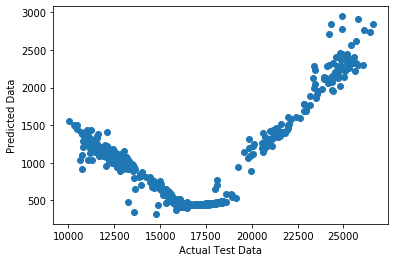

In [19]:
#checking scatetr of data between Y_tets adn predicted values
plt.scatter(y_test,predicctvalues)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.show()

In [21]:
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network._multilayer_perceptron:

class MLPRegressor(sklearn.base.RegressorMixin, BaseMultilayerPerceptron)
 |  MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic'

# build model with  Neural network

##  with hidden layers activation functions ,solver and learning rates

In [22]:
nn_model=MLPRegressor(hidden_layer_sizes=(10,15,10),activation="relu",solver="lbfgs",alpha=0.001,learning_rate="adaptive",random_state=0).fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [23]:
#predict using thw built models
predictvalues=nn_model.predict(x_test)

In [24]:
#coeficient of determination R^2 of the predicted mpdel
nn_model.score(x_train,y_train)

0.9999996884613206

In [27]:
#check RMSE
print(math.sqrt(mean_squared_error(y_test,predictvalues)))

2.1393839809742334


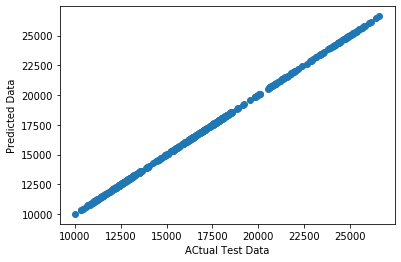

In [30]:
#checking scatter of data between Y_test and predicted values
plt.scatter(y_test,predictvalues)
plt.xlabel("ACtual Test Data")
plt.ylabel("Predicted Data")
plt.show()